In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv('/content/drive/MyDrive/colab/data/house_prices.csv')
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,13300000,7420,4,2,yes,no,yes,2
1,12250000,8960,4,4,yes,no,yes,3
2,12250000,9960,3,2,yes,no,no,2
3,12215000,7500,4,2,yes,no,yes,3
4,11410000,7420,4,1,yes,yes,yes,2


***Tiền xử lý dữ liệu***

In [26]:
#Đổi các dữ liệu từ dạng chuỗi sang dạng số
lb_make = LabelEncoder()
#Chuyển đổi
df['mainroad'] = lb_make.fit_transform(df['mainroad'])
df['guestroom'] = lb_make.fit_transform(df['guestroom'])
df['airconditioning'] = lb_make.fit_transform(df['airconditioning'])

df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,13300000,7420,4,2,1,0,1,2
1,12250000,8960,4,4,1,0,1,3
2,12250000,9960,3,2,1,0,0,2
3,12215000,7500,4,2,1,0,1,3
4,11410000,7420,4,1,1,1,1,2


***Xây dựng mô hình dự đoán***

In [27]:
#Xác định thuộc tính độc lập và thuộc tính phụ thuộc
features = ['area','bedrooms','bathrooms','mainroad','guestroom','airconditioning','parking']
target = ['price']

x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

print(y_test)

       price
316  4060000
77   6650000
360  3710000
90   6440000
493  2800000
..       ...
395  3500000
425  3360000
195  4970000
452  3150000
154  5530000

[164 rows x 1 columns]


**Xây dựng mô hình huẩn luyện bằng thư viện GradientBoostingRegressor**

In [51]:
gradientBoosting = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.05, max_depth=2)

GradientBoosting = gradientBoosting.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Kiểm thử mô hình và dự đoán độ chính xác***

In [56]:
y_pred = GradientBoosting.predict(x_test)
print(r2_score(y_test, y_pred)*100,"%")

54.70104084803543 %


***Vẽ đồ thị mô tả dự đoán giá nhà***

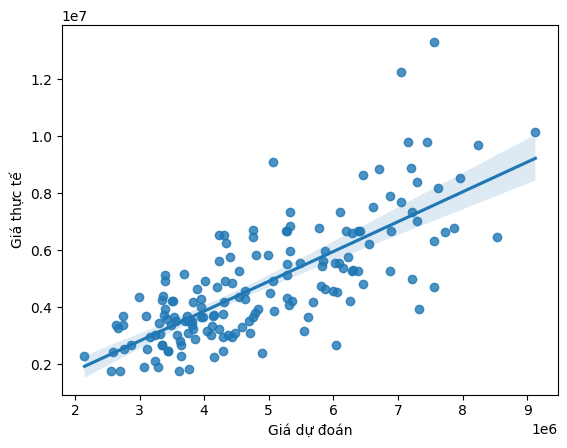

In [68]:
sb.regplot(x=y_pred, y=y_test)
plt.xlabel("Giá dự đoán")
plt.ylabel("Giá thực tế")
plt.show("Biểu đồ dự đoán giá nhà giữa dự đoán và thực tế")

***Xây dựng mô hình huẩn luyện bằng thư viện LinearRegression***

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

***Kiểm thử mô hình và dự đoán độ chính xác***

In [67]:
y_pred1 = model.predict(x_test)
print(r2_score(y_test, y_pred1)*100,"%")

56.493611893361916 %


***Vẽ đồ thị mô tả dự đoán giá nhà***

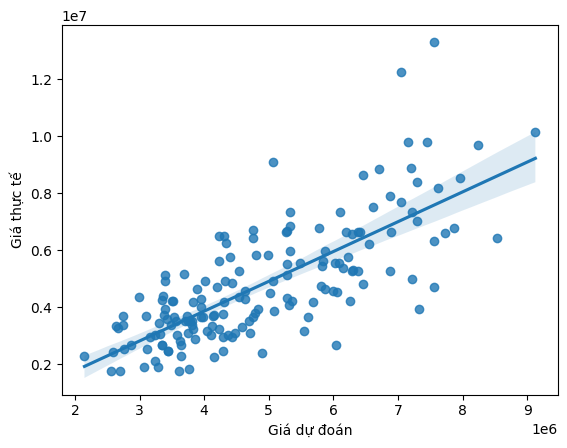

In [69]:
sb.regplot(x=y_pred1, y=y_test)
plt.xlabel("Giá dự đoán")
plt.ylabel("Giá thực tế")
plt.show("Biểu đồ dự đoán giá nhà giữa dự đoán và thực tế")

***Thử với một tệp dữ liệu mới***

In [62]:
print(GradientBoosting.predict([[7420,4,2,1,0,1,2]]))

[8824131.09986184]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
